In [39]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats

Bring in Dataset No.1 (Construction Confidence Dataset)
Bring in Dataset No.2 (Producer Price Dataset)
Bring in Dataset No.3 (Construction Industry Production Index)
Bring in Dataset No.4 (Employment expectations)
Bring in Dataset No.5 (Construction_Cost_index Dataset)

In [2]:
Construction_Confidence_All = pd.read_csv('Confidence_Indicator_IE_UK_DK.gz')
Producer_Price_Df = pd.read_csv('producer prices or costs new residential buildings IE only.gz')
Industry_Df = pd.read_csv('Industry Production Index IE DK UK- monthly data.gz')
Employment_Df = pd.read_csv('Employment Expectations IE DK.gz')
Construction_Cost_index = pd.read_csv('national_house_construction_cost_index.csv')

In [3]:
Construction_Confidence_All.head(5)

,DATAFLOW,LAST UPDATE,freq,indic,s_adj,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-01,-9.5,NaN
1,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-02,-14.6,NaN
2,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-03,-14.6,NaN
3,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-04,-30.9,NaN
4,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-05,-31.0,NaN


In [4]:
Producer_Price_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-02,0.0,NaN
1,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-03,2.3,NaN
2,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-04,2.3,NaN
3,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-05,2.4,NaN
4,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-06,0.5,NaN


In [5]:
Industry_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,nace_r2,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-01,102.6,s
1,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-02,102.2,s
2,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-03,104.4,s
3,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-04,103.9,s
4,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-05,107.5,s


In [6]:
Employment_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-05,-4.0,NaN
1,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-06,-7.2,NaN
2,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-07,-10.1,NaN
3,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-08,-10.4,NaN
4,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-09,-12.3,NaN


In [7]:
Construction_Cost_index.head(5)

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN


In [8]:
print(Construction_Confidence_All.shape)
print(Producer_Price_Df.shape)
print(Industry_Df.shape)
print(Employment_Df.shape)
print(Construction_Cost_index.shape)

(1455, 9)
(278, 11)
(1071, 11)
(21, 10)
(16, 24)


Prepare the Construction Dataset to be melted

In [9]:
# Delete the first row and the yearly average row
Construction_Cost_index = Construction_Cost_index.iloc[1:14]


# Reset the headers
Construction_Cost_index.columns = Construction_Cost_index.iloc[0]
Construction_Cost_index = Construction_Cost_index[1:].reset_index(drop=True)

Construction_Cost_index.head(15)

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


Melt the construction dataset

In [10]:
# Define a dictionary to map month names to numeric values
month_dict = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}


# Reshape the dataset
Construction_Cost_index_melted = Construction_Cost_index.melt(
    id_vars='Month',
    var_name='Year',
    value_name='Data'
)

# Map month names to numeric values
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].map(month_dict)

# Concatenate 'Year' and 'Month' columns
Construction_Cost_index_melted['Year'] = Construction_Cost_index_melted['Year'].astype(str)
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].astype(str)
Construction_Cost_index_melted['TIME_PERIOD'] = Construction_Cost_index_melted[str('Year')] + '-' + Construction_Cost_index_melted[str('Month')]

# Bring in only the columns we're interested in
Construction_Cost_index_melted = Construction_Cost_index_melted[['TIME_PERIOD', 'Data']]

# Reset index
Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

##Change the datatype so that it is numeric like the others
Construction_Cost_index_melted['Data'] = Construction_Cost_index_melted['Data'].astype(float)
Construction_Cost_index_melted['TIME_PERIOD'] = Construction_Cost_index_melted['TIME_PERIOD'].astype(object)

Construction_Cost_index_melted['geo'] = 'IE'

#check output
Construction_Cost_index_melted.head(5)


,TIME_PERIOD,Data,geo
0,1994-01,109.2,IE
1,1994-02,109.3,IE
2,1994-03,109.4,IE
3,1994-04,110.3,IE
4,1994-05,110.1,IE


Rename the columns to ensure clarity after concatenation

In [11]:
Construction_Confidence_All.columns.values[7] = 'Constr_Confidence_Value'
Producer_Price_Df.columns.values[9] = 'Producer_Price_Percent_change'
Industry_Df.columns.values[9] = 'Industry_Prod_index'
Employment_Df.columns.values[8] = 'Employment_Expectation_Score'
Construction_Cost_index_melted.columns.values[1] = 'Construction_cost_index'

Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

#Reduce the columns to only those we need in the concatenate
Construction_Confidence_All = Construction_Confidence_All.iloc[:, [5,6, 7]]
Producer_Price_Df = Producer_Price_Df.iloc[:, [7,8, 9]]
Industry_Df = Industry_Df.iloc[:, [7,8, 9]]
Employment_Df = Employment_Df.iloc[:, [6,7,8]]


In [12]:
print(Construction_Cost_index_melted)

    TIME_PERIOD  Construction_cost_index geo
0       1994-01                    109.2  IE
1       1994-02                    109.3  IE
2       1994-03                    109.4  IE
3       1994-04                    110.3  IE
4       1994-05                    110.1  IE
..          ...                      ...  ..
271   2016.0-08                      NaN  IE
272   2016.0-09                      NaN  IE
273   2016.0-10                      NaN  IE
274   2016.0-11                      NaN  IE
275   2016.0-12                      NaN  IE

[276 rows x 3 columns]


In [13]:
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[1]: 'Constr_cost_index'}, inplace=True)
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[2]: 'geo'}, inplace=True)
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[0]: 'TIME_PERIOD'}, inplace=True)


Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

In [14]:
new_column_order = ['geo', 'TIME_PERIOD', 'Constr_cost_index']  # Specify the desired column order
Construction_Cost_index_melted = Construction_Cost_index_melted[new_column_order]

In [15]:
if 'Constr_cost_index' in Construction_Cost_index_melted.columns:
    Construction_Cost_index_melted = Construction_Cost_index_melted[new_column_order]
else:
    print("'Construction_cost_index' column not found in the DataFrame.")

In [16]:
Industry_Df.columns

Index(['geo', 'TIME_PERIOD', 'Industry_Prod_index'], dtype='object')

In [17]:
merged_df = pd.merge(Construction_Confidence_All, Producer_Price_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Industry_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Employment_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Construction_Cost_index_melted, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,1455.000000,278.000000,1071.000000,21.000000,266.000000
mean,-11.033196,0.293525,78.557890,0.842857,172.188722
std,23.744707,0.869392,40.419902,15.286614,36.328356
min,-72.500000,-3.500000,7.100000,-15.300000,109.200000
25%,-28.050000,0.000000,51.550000,-13.600000,131.500000
50%,-9.700000,0.100000,98.000000,-7.200000,184.750000
75%,2.150000,0.600000,105.700000,14.300000,204.975000
max,52.900000,4.500000,228.400000,26.400000,210.500000


In [18]:
Merged_df_UK = merged_df[merged_df['geo'] == 'UK'].copy()
Merged_df_DK = merged_df[merged_df['geo'] == 'DK'].copy()
Merged_df_IE = merged_df[merged_df['geo'] == 'IE'].copy()
Merged_df_IE.head(5)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
520,IE,1985-01,-35.6,NaN,9.7,NaN,NaN
521,IE,1985-02,-37.1,NaN,9.6,NaN,NaN
522,IE,1985-03,-35.3,NaN,10.1,NaN,NaN
523,IE,1985-04,-29.2,NaN,9.7,NaN,NaN
524,IE,1985-05,-30.0,NaN,9.6,NaN,NaN


EDA of Irish Dataset

In [19]:
Merged_df_IE.shape

(531, 7)

In [20]:
Merged_df_IE.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,457.000000,278.000000,519.000000,9.000000,266.000000
mean,0.909409,0.293525,50.958382,17.366667,172.188722
std,28.335961,0.869392,42.793446,5.588381,36.328356
min,-72.500000,-3.500000,7.100000,11.200000,109.200000
25%,-24.000000,0.000000,13.850000,13.300000,131.500000
50%,8.100000,0.100000,48.700000,14.900000,184.750000
75%,23.000000,0.600000,64.200000,22.600000,204.975000
max,52.900000,4.500000,228.400000,26.400000,210.500000


In [21]:
Merged_df_IE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 520 to 1540
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   geo                            531 non-null    object 
 1   TIME_PERIOD                    531 non-null    object 
 2   Constr_Confidence_Value        457 non-null    float64
 3   Producer_Price_Percent_change  278 non-null    float64
 4   Industry_Prod_index            519 non-null    float64
 5   Employment_Expectation_Score   9 non-null      float64
 6   Constr_cost_index              266 non-null    float64
dtypes: float64(5), object(2)
memory usage: 33.2+ KB


In [22]:
# Find the first observation without a null value in the 'Producer_Price_Percent_change' column
first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
first_valid_observation = Merged_df_IE.loc[first_valid_index]
print("First observation without a null value:")
print(first_valid_observation)

First observation without a null value:
geo                                   IE
TIME_PERIOD                      2000-02
Constr_Confidence_Value             48.2
Producer_Price_Percent_change        0.0
Industry_Prod_index                 37.8
Employment_Expectation_Score         NaN
Constr_cost_index                  136.1
Name: 701, dtype: object


In [23]:
Merged_df_IE.duplicated().sum()

0

In [24]:
Merged_df_IE.head(15)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
520,IE,1985-01,-35.6,NaN,9.7,NaN,NaN
521,IE,1985-02,-37.1,NaN,9.6,NaN,NaN
522,IE,1985-03,-35.3,NaN,10.1,NaN,NaN
523,IE,1985-04,-29.2,NaN,9.7,NaN,NaN
524,IE,1985-05,-30.0,NaN,9.6,NaN,NaN
525,IE,1985-06,-30.0,NaN,9.4,NaN,NaN
526,IE,1985-07,-29.7,NaN,9.5,NaN,NaN
527,IE,1985-08,-27.9,NaN,9.2,NaN,NaN
528,IE,1985-09,-28.8,NaN,9.5,NaN,NaN
529,IE,1985-10,-31.7,NaN,9.4,NaN,NaN


In [25]:
Merged_df_IE.tail(15)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
1514,IE,1984-10,NaN,NaN,9.5,NaN,NaN
1515,IE,1984-11,NaN,NaN,9.7,NaN,NaN
1516,IE,1984-12,NaN,NaN,10.0,NaN,NaN
1529,IE,2016.0-01,NaN,NaN,NaN,NaN,207.4
1530,IE,2016.0-02,NaN,NaN,NaN,NaN,207.1
1531,IE,2016.0-03,NaN,NaN,NaN,NaN,NaN
1532,IE,2016.0-04,NaN,NaN,NaN,NaN,NaN
1533,IE,2016.0-05,NaN,NaN,NaN,NaN,NaN
1534,IE,2016.0-06,NaN,NaN,NaN,NaN,NaN
1535,IE,2016.0-07,NaN,NaN,NaN,NaN,NaN


Data Cleansing and Preparation

In [26]:
filtered_df = pd.DataFrame(columns=Merged_df_IE.columns)  # Create an empty DataFrame to store filtered rows
removed_df = pd.DataFrame(columns=Merged_df_IE.columns)  # Create an empty DataFrame to store removed rows

for index, row in Merged_df_IE.iterrows():
    try:
        year = int(row['TIME_PERIOD'][:4])
        month = int(row['TIME_PERIOD'][5:7])
        if 1980 <= year <= 2023 and 1 <= month <= 12:
            filtered_df = filtered_df.append(row, ignore_index=True)
        else:
            removed_df = removed_df.append(row, ignore_index=True)
    except (ValueError, IndexError):
        removed_df = removed_df.append(row, ignore_index=True)


filtered_df.shape

(519, 7)

In [27]:
#rename the filtered dataset back to original title Merged_df_IE
Merged_df_IE = filtered_df

In [28]:
print(removed_df)

   geo TIME_PERIOD  Constr_Confidence_Value  Producer_Price_Percent_change  \
0   IE   2016.0-01                      NaN                            NaN   
1   IE   2016.0-02                      NaN                            NaN   
2   IE   2016.0-03                      NaN                            NaN   
3   IE   2016.0-04                      NaN                            NaN   
4   IE   2016.0-05                      NaN                            NaN   
5   IE   2016.0-06                      NaN                            NaN   
6   IE   2016.0-07                      NaN                            NaN   
7   IE   2016.0-08                      NaN                            NaN   
8   IE   2016.0-09                      NaN                            NaN   
9   IE   2016.0-10                      NaN                            NaN   
10  IE   2016.0-11                      NaN                            NaN   
11  IE   2016.0-12                      NaN                     

In [29]:
#Sort the time period field to ensure it is chronological
Merged_df_IE['TIME_PERIOD'] = pd.to_datetime(Merged_df_IE['TIME_PERIOD'], format='%Y-%m')

# Sort the DataFrame by the 'date_column' in chronological order
Merged_df_IE.sort_values('TIME_PERIOD', inplace=True)

# Reset the index of the DataFrame
Merged_df_IE.reset_index(drop=True, inplace=True)

In [30]:
# Find the first observation without a null value in the 'Producer_Price_Percent_change' column
first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
first_valid_observation = Merged_df_IE.loc[first_valid_index]
print("First observation without a null value:")
print(first_valid_observation)

First observation without a null value:
geo                                               IE
TIME_PERIOD                      2000-02-01 00:00:00
Constr_Confidence_Value                         48.2
Producer_Price_Percent_change                    0.0
Industry_Prod_index                             37.8
Employment_Expectation_Score                     NaN
Constr_cost_index                              136.1
Name: 241, dtype: object


In [31]:
Merged_df_IE_backup = Merged_df_IE #Back up the dataset so that the historical records around construction confience/sentiment could be accessed later

first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
Merged_df_IE = Merged_df_IE.loc[first_valid_index:]
Merged_df_IE.shape

(278, 7)

In [32]:
Merged_df_IE.head(10)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
241,IE,2000-02-01,48.2,0.0,37.8,NaN,136.1
242,IE,2000-03-01,49.0,2.3,39.0,NaN,136.4
243,IE,2000-04-01,31.2,2.3,42.1,NaN,136.5
244,IE,2000-05-01,39.0,2.4,42.4,NaN,136.8
245,IE,2000-06-01,35.7,0.5,42.8,NaN,136.9
246,IE,2000-07-01,34.1,1.4,44.9,NaN,137.2
247,IE,2000-08-01,35.1,2.0,43.6,NaN,137.2
248,IE,2000-09-01,34.8,1.1,44.6,NaN,137.7
249,IE,2000-10-01,41.9,0.4,47.2,NaN,153.8
250,IE,2000-11-01,31.1,1.8,49.1,NaN,153.8


In [85]:
Merged_df_IE = Merged_df_IE.dropna(subset=['Constr_Confidence_Value'])
Merged_df_DK = Merged_df_DK.dropna(subset=['Constr_Confidence_Value'])
Merged_df_UK = Merged_df_UK.dropna(subset=['Constr_Confidence_Value'])



Dashboard


In [36]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# import pandas as pd



# # Create the Dash app
# app = dash.Dash(__name__)

# # Define the layout
# app.layout = html.Div(
#     children=[
#         html.H1('Interactive Dashboard'),
#         dcc.Graph(
#             id='line-chart',
#             figure={
#                 'data': [
#                     {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Constr_Confidence_Value'], 'type': 'line', 'name': 'Construction Confidence Value'},
#                     {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Producer_Price_Percent_change'], 'type': 'line', 'name': 'Producer Price Percent Change'},
#                     {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Industry_Prod_index'], 'type': 'line', 'name': 'Industry Production Index'},
#                     {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Constr_cost_index'], 'type': 'line', 'name': 'Construction Cost Index'}
#                 ],
#                 'layout': {
#                     'title': 'Time Series Data',
#                     'xaxis': {'title': 'Time Period'},
#                     'yaxis': {'title': 'Value'}
#                 }
#             }
#         )
#     ]
# )

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [25/May/2023 19:26:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:50] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:50] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:50] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:50] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [25/May/2023 19:26:50] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


# 2. Statistics

In [53]:
##First bring the other two datasets against which we're performing an Irish comparison into the same format as IE
Merged_df_UK['TIME_PERIOD'] = pd.to_datetime(Merged_df_UK['TIME_PERIOD'], format='%Y-%m')
Merged_df_DK['TIME_PERIOD'] = pd.to_datetime(Merged_df_DK['TIME_PERIOD'], format='%Y-%m')

Merged_df_UK = Merged_df_UK[Merged_df_UK['TIME_PERIOD'].isin(Merged_df_IE['TIME_PERIOD'].unique())]
Merged_df_DK = Merged_df_DK[Merged_df_DK['TIME_PERIOD'].isin(Merged_df_IE['TIME_PERIOD'].unique())]

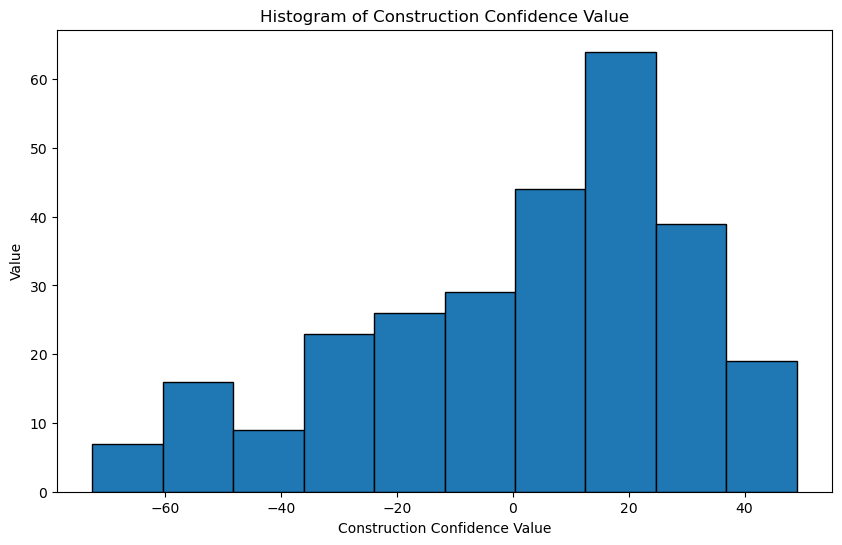

In [76]:
plt.figure(figsize=(10, 6))
plt.hist(Merged_df_IE['Constr_Confidence_Value'], bins=10, edgecolor='black')
plt.xlabel('Construction Confidence Value')
plt.ylabel('Value')
plt.title('Histogram of Construction Confidence Value')
plt.show()

In [41]:
Merged_df_IE.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,276.000000,278.000000,278.000000,9.000000,191.000000
mean,1.765942,0.293525,81.278058,17.366667,191.793194
std,28.229057,0.869392,37.052760,5.588381,19.312358
min,-72.500000,-3.500000,37.800000,11.200000,136.100000
25%,-16.775000,0.000000,57.950000,13.300000,179.650000
50%,9.750000,0.100000,63.350000,14.900000,202.000000
75%,22.400000,0.600000,100.425000,22.600000,206.200000
max,49.000000,4.500000,228.400000,26.400000,210.500000


In [50]:
Merged_df_UK.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,237.000000,0.0,249.000000,0.0,0.0
mean,-14.624473,NaN,101.533333,NaN,NaN
std,17.706146,NaN,4.808248,NaN,NaN
min,-62.500000,NaN,72.500000,NaN,NaN
25%,-26.600000,NaN,98.900000,NaN,NaN
50%,-6.200000,NaN,102.800000,NaN,NaN
75%,-2.600000,NaN,105.200000,NaN,NaN
max,8.500000,NaN,109.000000,NaN,NaN


In [54]:
Merged_df_DK.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,278.000000,0.0,277.000000,11.000000,0.0
mean,-14.371942,NaN,107.536823,-11.363636,NaN
std,14.944567,NaN,8.843081,3.447687,NaN
min,-55.700000,NaN,90.200000,-15.300000,NaN
25%,-22.950000,NaN,99.800000,-13.950000,NaN
50%,-12.450000,NaN,108.000000,-12.300000,NaN
75%,-3.925000,NaN,111.400000,-10.050000,NaN
max,16.100000,NaN,146.700000,-4.000000,NaN


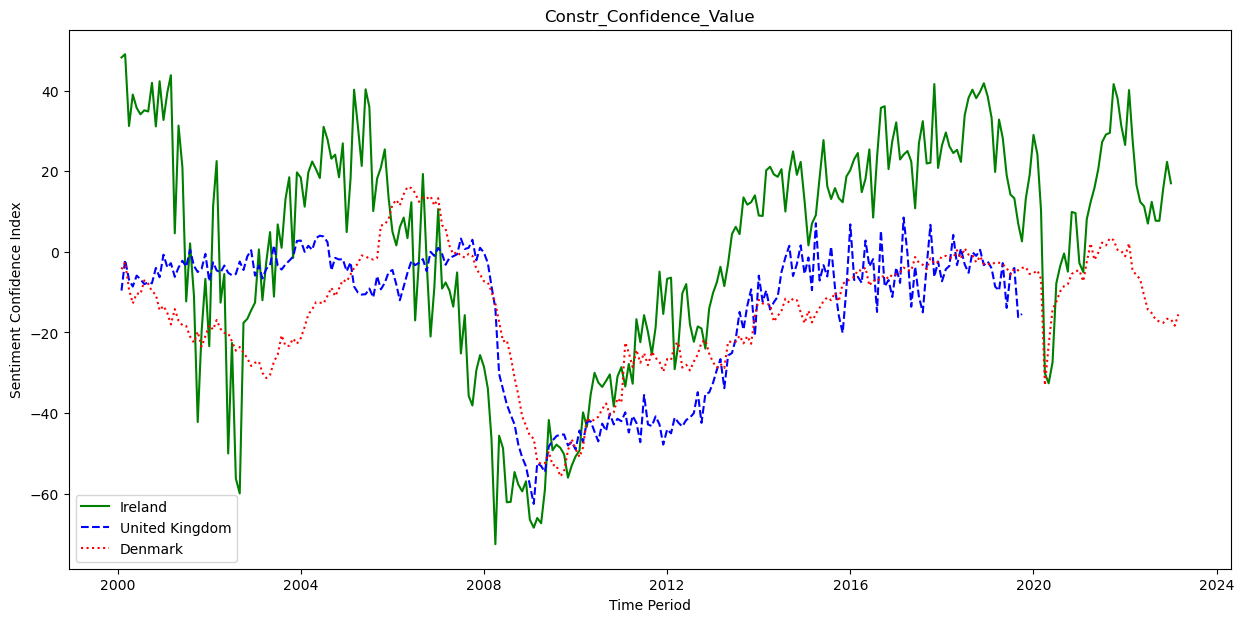

In [75]:
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])

# Plot the combined data
#plt.plot(combined_data['TIME_PERIOD'], combined_data['Constr_Confidence_Value'], label='Combined Data')

plt.figure(figsize=(15, 7))  # Adjust the width and height as needed

# Customize the plot
plt.title('Constr_Confidence_Value')
plt.xlabel('Time Period')
plt.ylabel('Sentiment Confidence Index')


plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Constr_Confidence_Value'], label='Ireland', linestyle='-', color='green')
plt.plot(Merged_df_UK['TIME_PERIOD'], Merged_df_UK['Constr_Confidence_Value'], label='United Kingdom', linestyle='--', color='blue')
plt.plot(Merged_df_DK['TIME_PERIOD'], Merged_df_DK['Constr_Confidence_Value'], label='Denmark', linestyle=':', color='red')


plt.legend()

# Show the plot
#plt.show()

In [84]:
# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_IE['Constr_Confidence_Value']
print(values)

241    48.2
242    49.0
243    31.2
244    39.0
245    35.7
       ... 
514    15.8
515    22.3
516    17.0
517     NaN
518     NaN
Name: Constr_Confidence_Value, Length: 278, dtype: float64


In [87]:


# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_IE['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for Ireland ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for Ireland (95.0%): (-1.5791298367651585, 5.111013894736162)


In [88]:
# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_UK['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for the UK ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for the UK (95.0%): (-16.890320928723483, -12.358624218955848)


In [89]:
# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_DK['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for Denmark ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for Denmark (95.0%): (-16.136397913234163, -12.607486978852176)


In [91]:
correlation = Merged_df_IE['Constr_Confidence_Value'].corr(Merged_df_IE['Industry_Prod_index'])

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.3055670916482125


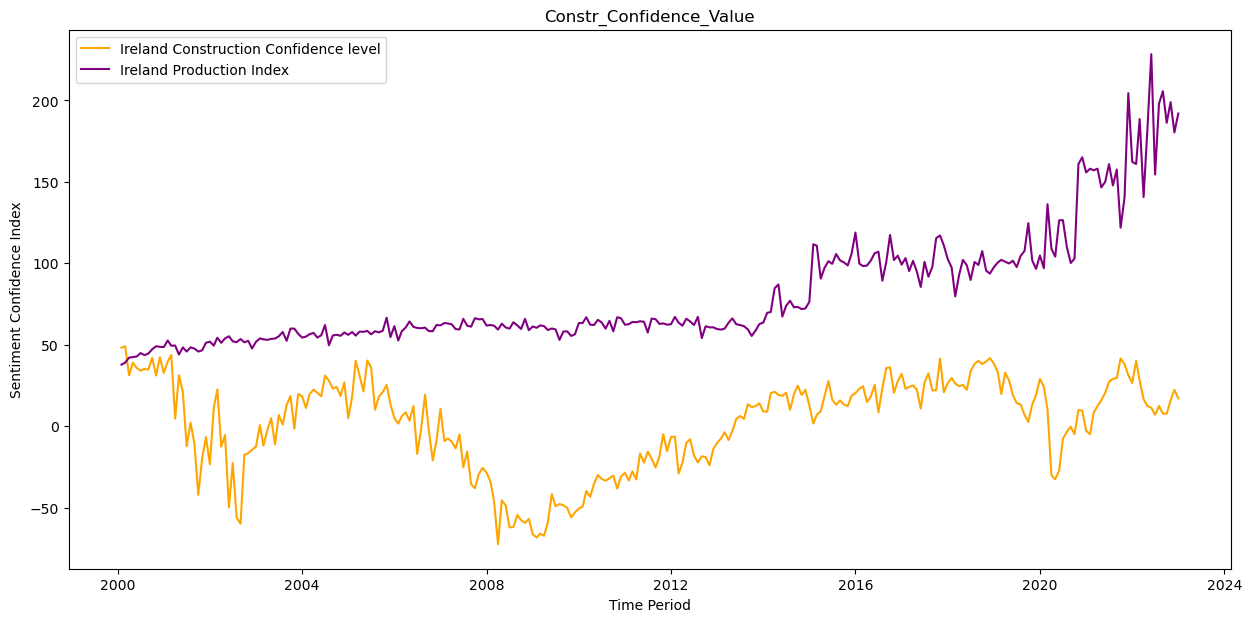

In [95]:
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])

# Plot the combined data
#plt.plot(combined_data['TIME_PERIOD'], combined_data['Constr_Confidence_Value'], label='Combined Data')

plt.figure(figsize=(15, 7))  # Adjust the width and height as needed

# Customize the plot
plt.title('Constr_Confidence_Value')
plt.xlabel('Time Period')
plt.ylabel('Sentiment Confidence Index')


plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Constr_Confidence_Value'], label='Ireland Construction Confidence level', linestyle='-', color='orange')
plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Industry_Prod_index'], label='Ireland Production Index', linestyle='-', color='purple')


plt.legend()

# Show the plot
#plt.show()

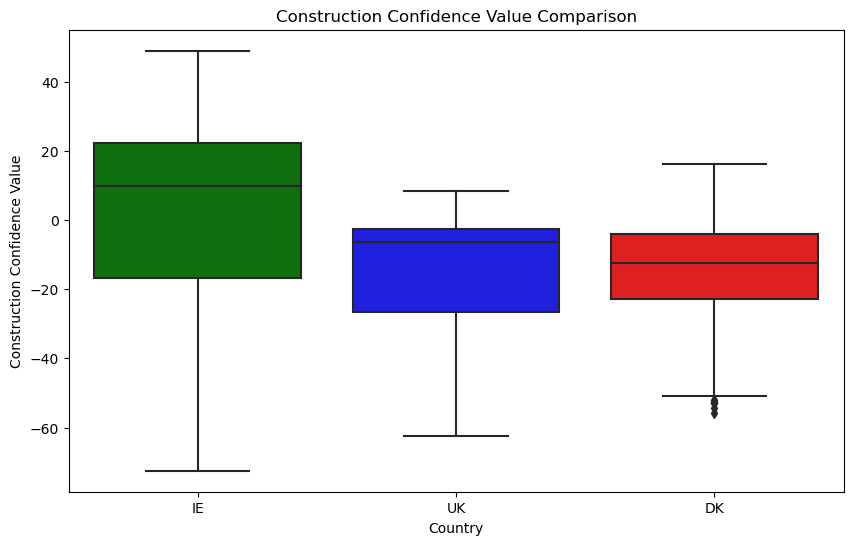

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])

# Define a color palette for each dataset
colors = {'IE': 'green', 'UK': 'blue', 'DK': 'red'}


# Check if each dataset is present in the 'geo' column and assign colors
if 'IE' in combined_data['geo']:
    colors['IE'] = 'green'
if 'UK' in combined_data['geo']:
    colors['UK'] = 'blue'
if 'DK' in combined_data['geo']:
    colors['DK'] = 'red'

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['geo'], y=combined_data['Constr_Confidence_Value'], palette=colors)

# Customize the plot
plt.title('Construction Confidence Value Comparison')
plt.xlabel('Country')
plt.ylabel('Construction Confidence Value')

# Show the plot
plt.show()

In [81]:
Merged_df_IE.head()

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
241,IE,2000-02-01,48.2,0.0,37.8,NaN,136.1
242,IE,2000-03-01,49.0,2.3,39.0,NaN,136.4
243,IE,2000-04-01,31.2,2.3,42.1,NaN,136.5
244,IE,2000-05-01,39.0,2.4,42.4,NaN,136.8
245,IE,2000-06-01,35.7,0.5,42.8,NaN,136.9


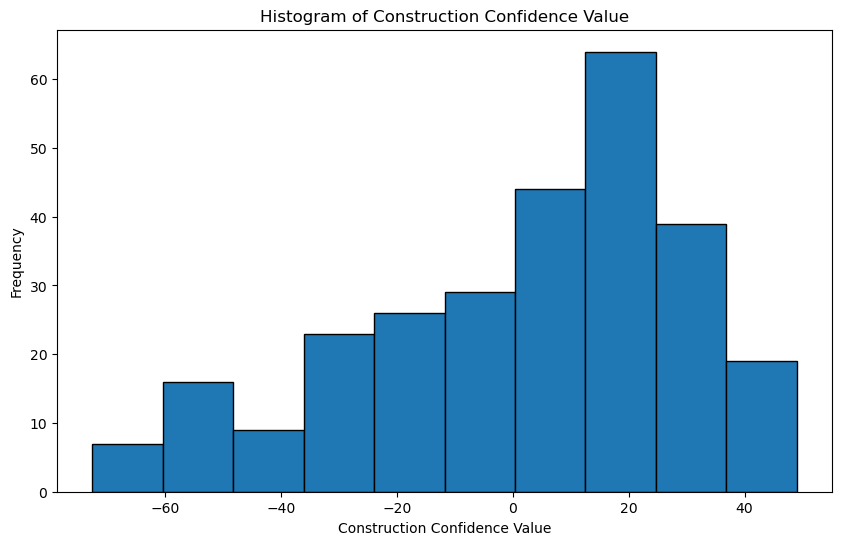

In [35]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd


# Create the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div(
    children=[
        html.H1('Interactive Dashboard'),
        dcc.Graph(
            id='choropleth-map',
            figure={
                'data': [
                    {
                        'type': 'choropleth',
                        'locations': Merged_df_IE['geo'],
                        'z': Merged_df_IE['Constr_Confidence_Value'],
                        'text': Merged_df_IE['geo'],
                        'colorscale': 'YlOrRd',
                        'autocolorscale': False,
                        'reversescale': True,
                        'marker': {
                            'line': {'color': 'rgb(180,180,180)'},
                            'opacity': 0.7
                        },
                        'colorbar': {'title': 'Construction Confidence Value'}
                    }
                ],
                'layout': {
                    'title': 'Construction Confidence Value by Country',
                    'geo': {'scope': 'europe'}
                }
            }
        ),
        dcc.Graph(id='line-chart')
    ]
)


# Define callback for line chart
@app.callback(
    dash.dependencies.Output('line-chart', 'figure'),
    dash.dependencies.Input('choropleth-map', 'clickData')
)
def update_line_chart(clickData):
    if clickData is not None:
        selected_country = clickData['points'][0]['location']
        filtered_data = Merged_df_IE[Merged_df_IE['geo'] == selected_country]

        figure = {
            'data': [
                {'x': filtered_data['TIME_PERIOD'], 'y': filtered_data['Constr_Confidence_Value'], 'type': 'line', 'name': 'Construction Confidence Value'},
                {'x': filtered_data['TIME_PERIOD'], 'y': filtered_data['Producer_Price_Percent_change'], 'type': 'line', 'name': 'Producer Price Percent Change'},
                {'x': filtered_data['TIME_PERIOD'], 'y': filtered_data['Industry_Prod_index'], 'type': 'line', 'name': 'Industry Production Index'},
                {'x': filtered_data['TIME_PERIOD'], 'y': filtered_data['Constr_cost_index'], 'type': 'line', 'name': 'Construction Cost Index'}
            ],
            'layout': {
                'title': f'Time Series Data for {selected_country}',
                'xaxis': {'title': 'Time Period'},
                'yaxis': {'title': 'Value'}
            }
        }

        return figure


# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [25/May/2023 19:25:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:25:28] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:25:28] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:25:28] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [25/May/2023 19:25:28] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [25/May/2023 19:25:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/May/2023 19:26:24] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [25/May/2023 19:26:24] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 

Bring in Dataset No.1 (Construction Confidence Dataset)

In [ ]:

Construction_Confidence_All = pd.read_csv('Confidence_Indicator_IE_UK_DK.gz')


    
#Rename the column so that when we merge it with other datasets later, it has a meaningful name



Construction_Confidence_All.head(10)

Create 3 sub Confidence Dataframes for each country (IE, DK, UK) so they can be analysed individually

In [ ]:
Construction_Confidence_IE = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'IE'].copy()
Construction_Confidence_IE = Construction_Confidence_IE.iloc[:, [5,6, 7]]
Construction_Confidence_IE.head(2)

In [ ]:
Construction_Confidence_DK = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'DK'].copy()
Construction_Confidence_DK = Construction_Confidence_DK.iloc[:, [5,6, 7]]
Construction_Confidence_DK.head(2)

In [ ]:
Construction_Confidence_UK = Construction_Confidence_All[Construction_Confidence_All['geo'] == 'UK'].copy()
Construction_Confidence_UK = Construction_Confidence_UK.iloc[:, [5, 6, 7]]
Construction_Confidence_UK.head(2)

Bring in Dataset No.2 (Producer Price Dataset)

In [ ]:

#Rename the column so that when we merge it with other datasets later, it has a meaningful name



Producer_Price_Df = Producer_Price_Df.iloc[:, [7,8, 9]]
    
Producer_Price_Df.head(10)

Bring in Dataset No.3 (Construction Industry Production Index)

In [ ]:

#Rename the column so that when we merge it with other datasets later, it has a meaningful name



Industry_Df = Industry_Df.iloc[:, [7,8, 9]]
   
Industry_Df.head(10)

Create 3 sub Industry for each country (IE, DK, UK) so they can be analysed individually

In [ ]:
Industry_Df_IE = Industry_Df[Industry_Df['geo'] == 'IE'].copy()
Industry_Df_IE.head(2)



In [ ]:
Industry_Df_DK = Industry_Df[Industry_Df['geo'] == 'DK'].copy()
Industry_Df_DK.head(2)

In [ ]:
Industry_Df_UK = Industry_Df[Industry_Df['geo'] == 'UK'].copy()
Industry_Df_UK.head(2)

Bring in Dataset No.4 (Employment expectations)

In [ ]:
column_info = merged_df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'Data Type'})
print(column_info)
#Rename the column so that when we merge it with other datasets later, it has a meaningful name



Employment_Df = Employment_Df.iloc[:, [6,7,8]]
    
Employment_Df.head(10)

In [ ]:
Employment_Df_IE = Employment_Df[Employment_Df['geo'] == 'IE'].copy()
Employment_Df_IE.head(2)

In [ ]:
Employment_Df_DK = Employment_Df[Employment_Df['geo'] == 'DK'].copy()
Employment_Df_DK.head(2)

Bring in Dataset No.5 (Construction_Cost_index Dataset)

In [ ]:
Construction_Cost_index = pd.read_csv('national_house_construction_cost_index.csv')

In [ ]:
Construction_Cost_index.head(15)

Prepare the 5th dataset for the melt function

In [ ]:
# Delete the first row and the yearly average row
Construction_Cost_index = Construction_Cost_index.iloc[1:14]


# Reset the headers
Construction_Cost_index.columns = Construction_Cost_index.iloc[0]
Construction_Cost_index = Construction_Cost_index[1:].reset_index(drop=True)

Construction_Cost_index.head(15)

In [ ]:
#Rename the column so that when we merge it with other datasets later, it has a meaningful name


Construction_Cost_index_melted.head(3)


Merge the IE datasets together

In [ ]:
merged_df = pd.merge(Construction_Confidence_IE, Producer_Price_Df, on=['TIME_PERIOD', 'geo'], how='outer')

merged_df = pd.merge(merged_df, Industry_Df_IE, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Employment_Df_IE, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Construction_Cost_index_melted, on=['TIME_PERIOD'], how='outer')

merged_df.head(5)

In [ ]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = merged_df[columns_to_plot]

# Create the pairplot
sns.pairplot(data_to_plot)

In [ ]:
df = merged_df.iloc[181:457]

df.tail(10)

In [ ]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = df[columns_to_plot]
sns.set(context="notebook")
# Create the pairplot
sns.pairplot(data_to_plot)

In [ ]:
columns_to_change = ['Constr_Confidence_Value', 'Industry_Prod_index', 'Construction_cost_index']

# Calculate the percentage increase for selected columns
percentage_increase_df = merged_df[columns_to_change].pct_change() * -100

# Combine the percentage increase dataframe with the unchanged column
result_df = pd.concat([merged_df['Producer_Price_Percent_change'], percentage_increase_df], axis=1)
result_df = pd.concat([merged_df['TIME_PERIOD'], result_df], axis=1)
result_df = pd.concat([merged_df['geo'], result_df], axis=1)

In [ ]:
result_df.head(10)

In [ ]:
import seaborn as sns
# Specify the columns to include in the pairplot
columns_to_plot = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index','Construction_cost_index' ]

# Extract the columns to plot as a separate dataframe
data_to_plot = result_df[columns_to_plot]
sns.set(context="notebook")
# Create the pairplot
sns.pairplot(data_to_plot)

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['Constr_Confidence_Value', 'Producer_Price_Percent_change', 'Industry_Prod_index', 'Employment_Expectation_Score']

# Extract the columns to be scaled as a separate dataframe
data_to_scale = merged_df[columns_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new dataframe with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

In [56]:
Merged_df_IE.to_csv('output1.csv', index=False)

In [ ]:
print(Merged_df_IE)

In [ ]:
Merged_df_IE['TIME_PERIOD'] = pd.to_datetime(Merged_df_IE['TIME_PERIOD'])

# Create a new column 'Formatted_Date' with the desired format 'MM-YYYY'
Merged_df_IE['Formatted_Date'] = Merged_df_IE['TIME_PERIOD'].dt.strftime('%m-%Y')

print(Merged_df_IE)